# 8-Laboratory-26-11-2020

> Credits to the authors of the exercises: Andrea Pasini, Giuseppe Attanasio, Flavio Giobergia <br />
Master of Science in Data Science and Engineering, Politecnico di Torino, A.A. 2020-21

## Synthetic generated data
In the first part of this laboratory you will practise what you learned about regression techniques with some trivial datasets synthetically generated by you. In particular you will generate 4 different datasets: the first 3 can be generated starting from some analytical functions while the fourth one will be generated exploiting the make_regression function available in the scikit-learn library (please refer to the officialdocumentation to learn how this function works)

<center>
     $f_1(x) = x \sin(x) + 2x$ <br />
     $f_2(x) = 10 \sin(x) + x^2$ <br />
     $f_3(x) = 10 sign(x)(x^2 + 300) + 20 \sin(x)$ <br />
</center>

- (1): Use the following snippet of code to create you initial dataset. Note thatf(x)should match one ofthe functions mentioned before.

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1, 2, 3

def get_function(X,n):
    if n == 1:
        y = X*np.sin(X) + 2*X
    elif n == 2:
        y = 10*np.sin(X) + X**2
    else:
        y = np.sign(X)*(X**2 + 300) + 20*np.sin(X)
    
    return y

Text(0.5, 1.0, 'f3(x)')

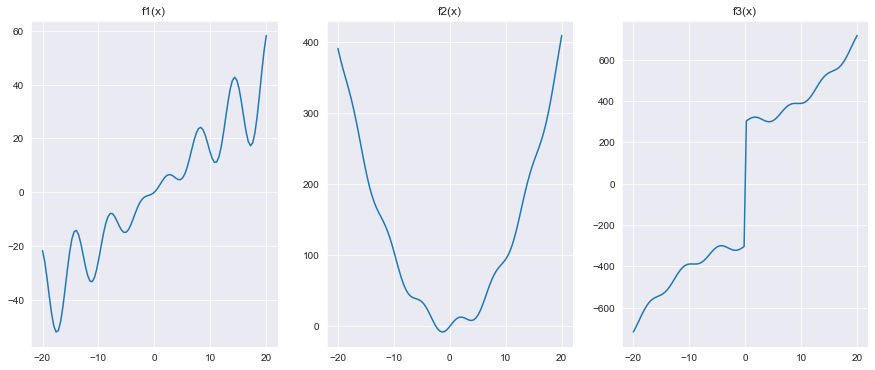

In [141]:
fig, ax = plt.subplots(1,3,figsize=(15,6))

tr = 20
n_samples = 100
X = np.linspace(-tr,tr,n_samples)

f1 = get_function(X,1)
f2 = get_function(X,2)
f3 = get_function(X,3)

ax[0].plot(X,f1)
ax[0].set_title("f1(x)")
ax[1].plot(X,f2)
ax[1].set_title("f2(x)")
ax[2].plot(X,f3)
ax[2].set_title("f3(x)")

In [142]:
from sklearn.model_selection import train_test_split

def get_train_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(
                    X,y,train_size = 0.7, random_state=42,shuffle=True
                )

    y_test = y_test[X_test.argsort()]
    X_test.sort()
    return X_train, X_test, y_train, y_test

- (2) : Draw and inspect the shape of the function. Which regression model of those you know could achievebetter performance.

f1(x) and f2(x) are an asymptotic behaviour, so it can be easily approximated with a polynomial regressor. Then, f3(x) has a discontinuity point, so have to see how will answer its approximation

- (3-4) : Frame now a regression task to your generated data. Start from the ordinary least squares LinearRegression. Then, choose additional models which you believe could outperform linear regression to approximate the function. Fit each model to the training data and predict the function value for each test point. Evaluate your regression outcome in terms of a metric of your choice. Refer tosklearn.metrics module to find some. Does any model stand out in terms of regression quality in every case or theshape of the function favors (or penalizes) any of them

I'll build general and autonomous methods, in order to better generalize the procedure with different regressors. 

In [166]:
from sklearn.metrics import r2_score

def eval_model(X,y,model,label,func):
    
    # train_test
    X_train, X_test, y_train, y_test = get_train_test(X,y)
    
    # prediction
    model.fit(X_train[:,np.newaxis],y_train)
    y_pred = model.predict(X_test[:,np.newaxis])
    
    # plot
    fig, ax = plt.subplots()
    ax.scatter(X, y, s=1, c='grey')
    ax.plot(X_test, y_pred,label=label)
    ax.set_title(func)
    fig.legend()
    
    return r2_score(y_test,y_pred)

In [179]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# I'll put inside that container all the models that I want to test
models_container = [
    RandomForestRegressor(n_estimators=300),
    MLPRegressor(hidden_layer_sizes=(10,10), random_state=42, tol=-1),
]

labels = ["Random Forest", "MLPRegressor"]

C:\Users\Francesco\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



***************	 ~ f1(x)
[('Random Forest', 0.9890353294678688), ('MLPRegressor', 0.7868519709515988)]


C:\Users\Francesco\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



***************	 ~ f2(x)
[('Random Forest', 0.99666082960087), ('MLPRegressor', -0.9879483040459145)]

***************	 ~ f3(x)
[('Random Forest', 0.9996721155442951), ('MLPRegressor', 0.05410369643573687)]


C:\Users\Francesco\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


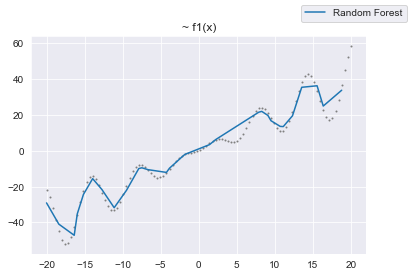

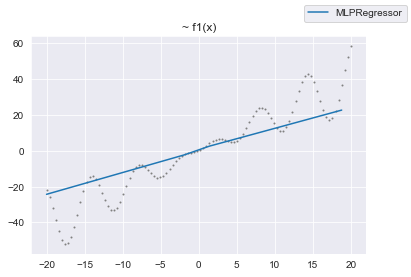

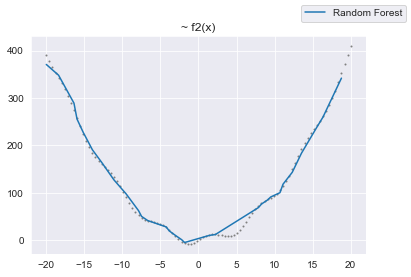

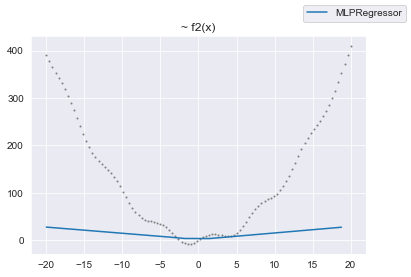

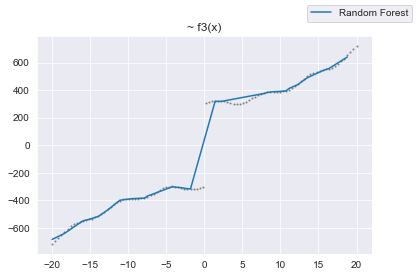

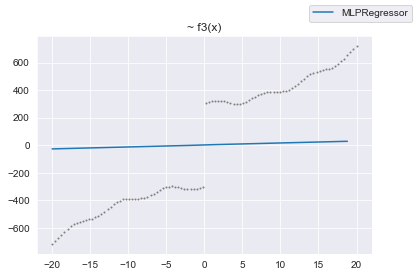

In [182]:

funcs = [f1,f2,f3]
titles = ["~ f1(x)","~ f2(x)","~ f3(x)"]

for f,t in zip(funcs,titles):
    r2_list = []
    for model, label in zip(models_container,labels):
        r2_list.append((label,eval_model(X,f,model,label,t)))
    print("\n***************\t",t)
    print(r2_list)

- (5) Back in Point 2, you could visually inspect the function shape1. Although this is not always thecase, you can exploit this sort of knowledge to enhance your initial representation. With this inmind, choose a set of new features (e.g. polynomials, trigonometric functions) and introduce themin training data. Then, test again your best performing model and discuss whether your scores haveimproved or worsened.

I already considered that we couldn't use a linear model to predict those functions, so I avoided to use them apriori, so I focues with RandomForest and a polynomial Random Forest and they seems the best way for that prediction, even if it seems a bit overfitted. But, we could apply a gridsearch in order to gain a proper result. 

- (6*) As many real-world tasks request, your model must be robust to noise. To test the model you developed in previous points, you can shift your initial data injecting some random noise. 

In [183]:
def inject_noise(y):
    """Add a random noise drawn from a normal distribution."""
    return y + np.random.normal(0, 50, size=y.size)

C:\Users\Francesco\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



***************	 ~ f1(x)
[('Random Forest', -0.016655507203076958), ('MLPRegressor', 0.04626268833100189)]


C:\Users\Francesco\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



***************	 ~ f2(x)
[('Random Forest', -0.016655507203076958), ('MLPRegressor', 0.04626268833100189), ('Random Forest', 0.8239701456955537), ('MLPRegressor', -0.8525867393047206)]

***************	 ~ f3(x)
[('Random Forest', -0.016655507203076958), ('MLPRegressor', 0.04626268833100189), ('Random Forest', 0.8239701456955537), ('MLPRegressor', -0.8525867393047206), ('Random Forest', 0.97836254403637), ('MLPRegressor', 0.05167289646251516)]


C:\Users\Francesco\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


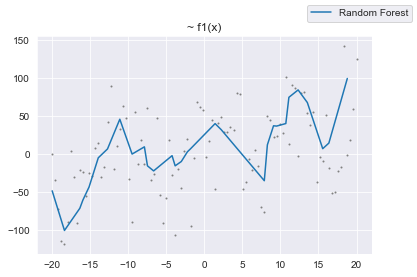

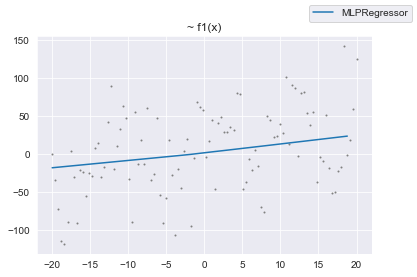

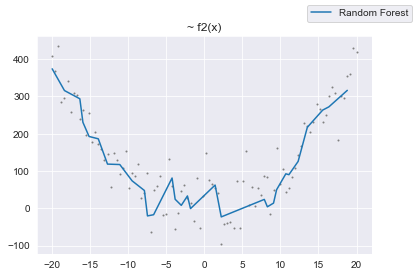

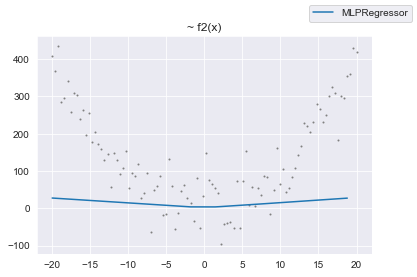

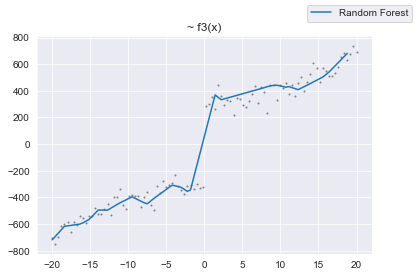

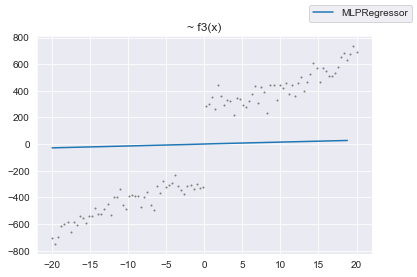

In [184]:
f1_noisey = inject_noise(f1)
f2_noisey = inject_noise(f2)
f3_noisey = inject_noise(f3)

r2_list = []
funcs = [f1_noisey,f2_noisey,f3_noisey]
titles = ["~ f1(x)","~ f2(x)","~ f3(x)"]

for f,t in zip(funcs,titles):
    for model, label in zip(models_container,labels):
        r2_list.append((label,eval_model(X,f,model,label,t)))
    print("\n***************\t",t)
    print(r2_list)

As it can be clearly seen, the most robust is the random forest, whose obtain nice results also in presence of noise.